In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import  assess_goodnes_of_cross_match, rayleigh_plot
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
set_mpl()
%matplotlib inline

matplotlib settings set


matplotlib settings set
matplotlib settings set


In [4]:
nway_old = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_oct_19.gz_pkl', compression='gzip')
nway_current = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')

In [12]:
nway_old.head(3)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id_true,nway_Separation_EROSITA_DESI,nway_match_flag,nway_prob_has_match,nway_prob_this_match,desi_id,nway_photometry_rel_dered_mag_g,nway_photometry_rel_dered_mag_r,nway_photometry_rel_dered_mag_z,nway_photometry_rel_dered_mag_w1,nway_photometry_rel_dered_mag_w2,nway_photometry_rel_dered_mag_w3,nway_photometry_rel_dered_mag_w4,nway_photometry_rel_dered_g_r,nway_photometry_rel_dered_r_z,nway_photometry_rel_dered_g_z,nway_photometry_rel_dered_z_w1,nway_photometry_rel_dered_r_w2,nway_photometry_rel_dered_w1_w2,nway_photometry_rel_dered_z_w3,nway_photometry_rel_dered_r_w4,nway_photometry_rel_dered_w3_w4,nway_photometry_prior_type,nway_photometry_nnmag_grzw1w2,nway_photometry_nnmag_grzw1w2_orig,nway_photometry_nnmag_grzw1,nway_photometry_nnmag_grzw1_orig,nway_photometry_nnmag_grz,nway_photometry_nnmag_grz_orig,nway_photometry_rel_dered_mag_g_orig,nway_photometry_rel_dered_mag_r_orig,nway_photometry_rel_dered_mag_z_orig,nway_photometry_rel_dered_mag_w1_orig,nway_photometry_rel_dered_mag_w2_orig,nway_photometry_rel_dered_mag_w3_orig,nway_photometry_rel_dered_mag_w4_orig,nway_photometry_rel_dered_g_r_orig,nway_photometry_rel_dered_r_z_orig,nway_photometry_rel_dered_g_z_orig,nway_photometry_rel_dered_z_w1_orig,nway_photometry_rel_dered_r_w2_orig,nway_photometry_rel_dered_w1_w2_orig,nway_photometry_rel_dered_z_w3_orig,nway_photometry_rel_dered_r_w4_orig,nway_photometry_rel_dered_w3_w4_orig,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_all_mag_g,desi_rel_mag_g,desi_rel_dered_mag_g,desi_all_mag_r,desi_rel_mag_r,desi_rel_dered_mag_r,desi_all_mag_z,desi_rel_mag_z,desi_rel_dered_mag_z,desi_all_mag_w1,desi_rel_mag_w1,desi_rel_dered_mag_w1,desi_vega_mag_w1,desi_all_mag_w2,desi_rel_mag_w2,desi_rel_dered_mag_w2,desi_vega_mag_w2,desi_all_mag_w3,desi_rel_mag_w3,desi_rel_dered_mag_w3,desi_vega_mag_w3,desi_all_mag_w4,desi_rel_mag_w4,desi_rel_dered_mag_w4,desi_vega_mag_w4,desi_rel_desi_flux_corr_z,desi_rel_dered_g_r,desi_rel_dered_g_z,desi_rel_dered_r_z,desi_rel_dered_z_w1,desi_rel_dered_r_w2,desi_rel_dered_w1_w2,desi_rel_dered_z_w3,desi_rel_dered_r_w4,desi_rel_dered_w3_w4,desi_lg(Fx/Fo_g),desi_lg(Fx/Fo_r),desi_lg(Fx/Fo_z),desi_rel_dered_lg(Fx/Fo_z),desi_rel_dered_lg(Fx/Fo_z_corr),desi_rel_dered_lg(Fx/Fo_g),desi_rel_dered_lg(Fx/Fo_r),nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237

In [21]:
nway_current.columns[:67]

Index(['srcname_fin', 'RA_fin', 'DEC_fin', 'GLON', 'GLAT', 'pos_r98',
       'DET_LIKE_0', 'ML_FLUX_0', 'ML_FLUX_ERR_0', 'ML_CTS_0', 'ML_CTS_ERR_0',
       'ML_EXP_1', 'EXT', 'EXT_LIKE', 'EXT_ERR', 'ID_SRC', 'ID_CLUSTER', 'RA',
       'DEC', 'RADEC_ERR', 'DIST_NN', 'SRCDENS', 'TSTART', 'TSTOP',
       'EXT_LOWERR', 'EXT_UPERR', 'ML_RATE_0', 'ML_RATE_ERR_0', 'ML_BKG_0',
       'RA_corr', 'DEC_corr', 'g_id', 'g_d2d', 'g_nsrc', 'g_s', 'g_gmag',
       'g_maxLx', 'g_b', 's_id', 's_z', 's_otype', 's_d2d', 's_nsrc',
       'flag_xray', 'flag_radio', 'flag_agn_wise', 'w1', 'w2', 'w3', 'w1snr',
       'w2snr', 'w3snr', 'w_nsrc', 'sdss_nsrc', 'sdss_p', 'sdss_id', 'sdss_sp',
       'sdss_d2d', 'hpidx', 'RADEC_ERR_fin', 'pos_sigma_2d', 'pos_r68',
       'pos_r95', 'ELON', 'ELAT', 'flux_05-20', 'NH'],
      dtype='object')

In [26]:
df_compare = nway_old.merge(nway_current, on=list(nway_current.columns[:67]), suffixes=['_old', '_current'])
df_compare['desi_differs'] = df_compare['desi_id_current'] != df_compare['desi_id_old']
df_compare = df_compare[df_compare['desi_differs']]
df_compare

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id_true_old,nway_Separation_EROSITA_DESI_old,nway_match_flag_old,nway_prob_has_match_old,nway_prob_this_match_old,desi_id_old,nway_photometry_rel_dered_mag_g_old,nway_photometry_rel_dered_mag_r_old,nway_photometry_rel_dered_mag_z_old,nway_photometry_rel_dered_mag_w1_old,nway_photometry_rel_dered_mag_w2_old,nway_photometry_rel_dered_mag_w3_old,nway_photometry_rel_dered_mag_w4_old,nway_photometry_rel_dered_g_r_old,nway_photometry_rel_dered_r_z_old,nway_photometry_rel_dered_g_z_old,nway_photometry_rel_dered_z_w1_old,nway_photometry_rel_dered_r_w2_old,nway_photometry_rel_dered_w1_w2_old,nway_photometry_rel_dered_z_w3_old,nway_photometry_rel_dered_r_w4_old,nway_photometry_rel_dered_w3_w4_old,nway_photometry_prior_type_old,nway_photometry_nnmag_grzw1w2_old,nway_photometry_nnmag_grzw1w2_orig_old,nway_photometry_nnmag_grzw1_old,nway_photometry_nnmag_grzw1_orig_old,nway_photometry_nnmag_grz_old,nway_photometry_nnmag_grz_orig_old,nway_photometry_rel_dered_mag_g_orig_old,nway_photometry_rel_dered_mag_r_orig_old,nway_photometry_rel_dered_mag_z_orig_old,nway_photometry_rel_dered_mag_w1_orig_old,nway_photometry_rel_dered_mag_w2_orig_old,nway_photometry_rel_dered_mag_w3_orig_old,nway_photometry_rel_dered_mag_w4_orig_old,nway_photometry_rel_dered_g_r_orig_old,nway_photometry_rel_dered_r_z_orig_old,nway_photometry_rel_dered_g_z_orig_old,nway_photometry_rel_dered_z_w1_orig_old,nway_photometry_rel_dered_r_w2_orig_old,nway_photometry_rel_dered_w1_w2_orig_old,nway_photometry_rel_dered_z_w3_orig_old,nway_photometry_rel_dered_r_w4_orig_old,nway_photometry_rel_dered_w3_w4_orig_old,desi_release_old,desi_objid_old,desi_brickid_old,desi_ra_old,desi_dec_old,desi_flux_g_old,desi_flux_r_old,desi_flux_z_old,desi_flux_w1_old,desi_flux_w2_old,desi_flux_w3_old,desi_flux_w4_old,desi_flux_ivar_g_old,desi_flux_ivar_r_old,desi_flux_ivar_z_old,desi_flux_ivar_w1_old,desi_flux_ivar_w2_old,desi_flux_ivar_w3_old,desi_flux_ivar_w4_old,desi_dered_mag_g_old,desi_dered_mag_r_old,desi_dered_mag_z_old,desi_dered_mag_w1_old,desi_dered_mag_w2_old,desi_dered_mag_w3_old,desi_dered_mag_w4_old,desi_snr_g_old,desi_snr_r_old,desi_snr_z_old,desi_snr_w1_old,desi_snr_w2_old,desi_snr_w3_old,desi_snr_w4_old,desi_type_old,desi_parallax_old,desi_parallax_ivar_old,desi_pmra_old,desi_pmra_ivar_old,desi_pmdec_old,desi_pmdec_ivar_old,desi_ref_cat_old,desi_ref_id_old,desi_mjd_max_old,desi_mjd_min_old,desi_iso_max_old,desi_iso_min_old,desi_all_mag_g_old,desi_rel_mag_g_old,desi_rel_dered_mag_g_old,desi_all_mag_r_old,desi_rel_mag_r_old,desi_rel_dered_mag_r_old,desi_all_mag_z_old,desi_rel_mag_z_old,desi_rel_dered_mag_z_old,desi_all_mag_w1_old,desi_rel_mag_w1_old,desi_rel_dered_mag_w1_old,desi_vega_mag_w1_old,desi_all_mag_w2_old,desi_rel_mag_w2_old,desi_rel_dered_mag_w2_old,desi_vega_mag_w2_old,desi_all_mag_w3_old,desi_rel_mag_w3_old,desi_rel_dered_mag_w3_old,desi_vega_mag_w3_old,desi_all_mag_w4_old,desi_rel_mag_w4_old,desi_rel_dered_mag_w4_old,desi_vega_mag_w4_old,desi_rel_desi_flux_corr_z,desi_rel_dered_g_r_old,desi_rel_dered_g_z_old,desi_rel_dered_r_z_old,desi_rel_dered_z_w1_old,desi_rel_dered_r_w2_old,desi_rel_dered_w1_w2_old,desi_rel_dered_z_w3_old,desi_rel_dered_r_w4_old,desi_rel_dered_w3_w4_old,desi_lg(Fx/Fo_g)_old,desi_lg(Fx/Fo_r)_old,desi_lg(Fx/Fo_z)_old,desi_rel_dered_lg(Fx/Fo_z)_old,desi_rel_dered_lg(Fx/Fo_z_corr)_old,desi_rel_dered_lg(Fx/Fo_g)_old,desi_rel_dered_lg(Fx/Fo_r)_old,nway_n_match_flag_0_old,nway_n_match_flag_2_old,nway_is_closest_old,nway_is_within_pos_r98_ol

In [34]:
df_compare[['nway_photometry_nnmag_grz_orig_old', 'nway_photometry_nnmag_grz_orig_current']]


,nway_photometry_nnmag_grz_orig_old,nway_photometry_nnmag_grz_orig_current
9,0.969379,0.738559
15,0.028838,0.173532
16,0.097369,0.331189
35,0.153928,0.321546
41,-99.000000,0.467738
...,...,...
6561,0.678604,0.522202
6564,0.358395,0.514206
6678,-99.000000,0.046862
6724,-99.000000,-99.000000


In [35]:
df_compare[['nway_prob_has_match_old', 'nway_prob_has_match_current']]

,nway_prob_has_match_old,nway_prob_has_match_current
9,0.576446,0.475710
15,0.060893,0.054406
16,0.250570,0.311777
35,0.000018,0.000030
41,0.002183,0.001301
...,...,...
6561,0.712966,0.831372
6564,0.891124,0.889901
6678,0.004215,0.005504
6724,0.274034,0.260952


<AxesSubplot: xlabel='nway_prob_this_match_old', ylabel='Count'>

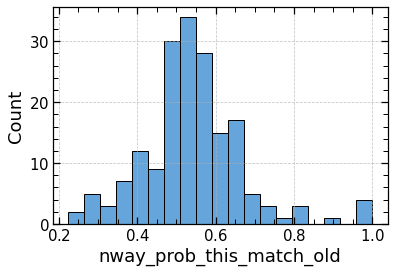

In [39]:
#sns.histplot(df_compare.nway_prob_has_match_old)
sns.histplot(df_compare.nway_prob_this_match_old)

In [47]:
len(df_compare)/len(nway_old)

0.02599854756717502

In [46]:
nway_old.nway_n_match_flag_2.value_counts()

0    6463
1     387
2      31
3       3
4       1
Name: nway_n_match_flag_2, dtype: int64

In [45]:
df_compare.nway_n_match_flag_2_current.value_counts().sort_index()

0     33
1    132
2     13
4      1
Name: nway_n_match_flag_2_current, dtype: int64

In [48]:
df_compare[['nway_n_match_flag_2_old', 'nway_n_match_flag_2_current']]


,nway_n_match_flag_2_old,nway_n_match_flag_2_current
9,1,1
15,2,0
16,1,1
35,1,0
41,1,1
...,...,...
6561,1,1
6564,1,1
6678,1,1
6724,1,1


In [32]:
df_compare[['nway_prob_this_match_old', 'nway_prob_this_match_current']]


,nway_prob_this_match_old,nway_prob_this_match_current
9,0.640980,0.569912
15,0.399709,0.596707
16,0.578021,0.593086
35,0.529959,0.726265
41,0.486303,0.546244
...,...,...
6561,0.543544,0.506537
6564,0.572567,0.529082
6678,0.514051,0.655164
6724,0.606007,0.581033
